# Titanic Survivor Prediction based on various features

## PART 1 Define

### Define the Problem

In this project, I will predict the survivors from titanic based on the features such as fare price, embarked, pclass, gender, age, and sibling/spouse. I will analyze the data available and create different models (logistic regression, random forest, and support vector machines) that will predict the most accurate survivors based on these features.

### Import Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## PART 2 Discover

### Load the data

In [160]:
#Load the data into a pandas DataFrame
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [161]:
#check train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [163]:
#check train describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [164]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [165]:
#check train head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore the data

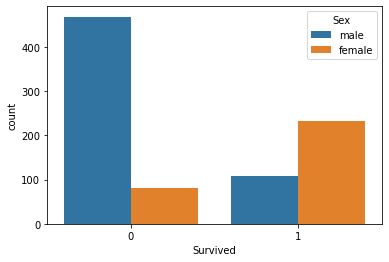

In [167]:
sns.countplot(x='Survived',hue='Sex',data=train)

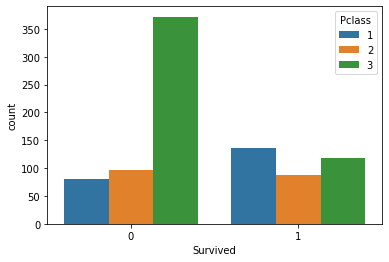

In [168]:
sns.countplot(x='Survived',data=train,hue='Pclass')

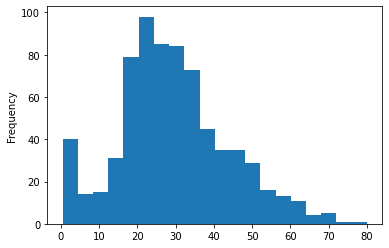

In [169]:
train['Age'].plot.hist(bins=20)

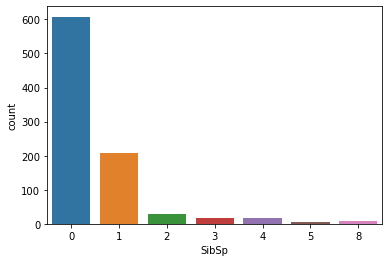

In [170]:
sns.countplot(x='SibSp',data=train)

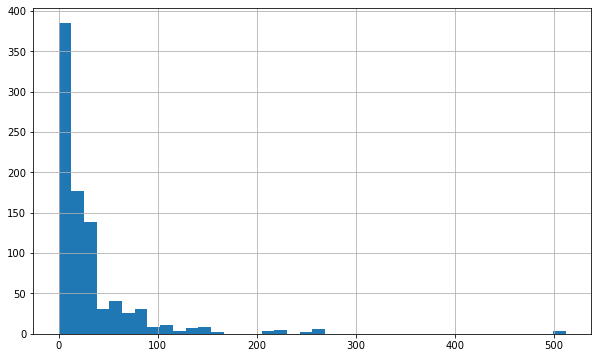

In [171]:
train['Fare'].hist(bins=40,figsize=(10,6))

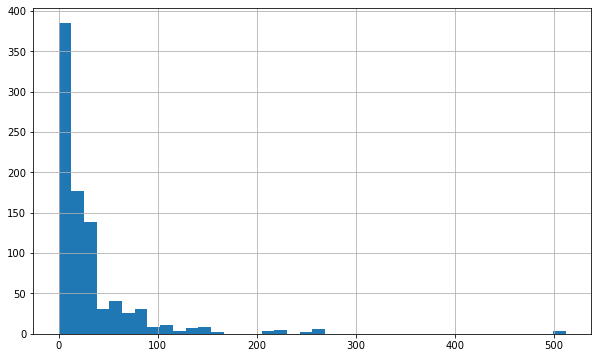

In [172]:
train['Fare'].hist(bins=40,figsize=(10,6))

### Clean the data

In [173]:
#check the null values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [175]:
#take care of Age
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

#take care of Fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

#take care of Cabin
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

#take care of Embarked
train = train.dropna()

In [176]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [177]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [178]:
#get dummies for sex, embarked, and pclass for train
train_sex = pd.get_dummies(train['Sex'],drop_first=True)
train_embarked = pd.get_dummies(train['Embarked'],drop_first=True)
train_pclass = pd.get_dummies(train['Pclass'],drop_first=True)

#get dummies for sex, embarked, and pclass for test
test_sex = pd.get_dummies(test['Sex'],drop_first=True)
test_embarked = pd.get_dummies(test['Embarked'],drop_first=True)
test_pclass = pd.get_dummies(test['Pclass'],drop_first=True)

In [179]:
#concat sex, embarked, and pclass to train dataframe
train.drop(['PassengerId','Name','Sex','Ticket','Embarked', 'Pclass'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Sex','Ticket','Embarked', 'Pclass'],axis=1,inplace=True)

train_filled = pd.concat([train, train_sex, train_embarked, train_pclass],axis=1)
test_filled = pd.concat([test, test_sex, test_embarked, test_pclass],axis=1)

In [180]:
train_filled.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [181]:
test_filled.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


## PART 3 Develop

In [182]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [183]:
X = train_filled.drop('Survived',axis=1)
y = train_filled['Survived']

### Logistic Regression

In [184]:
#import libraries
from sklearn.linear_model import LogisticRegression

In [185]:
lr=LogisticRegression(max_iter=1000)
mse=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print('mean_mse: {}'.format(mean_mse))

mean_mse: -0.20467847394147146


### Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rfc = RandomForestClassifier(n_estimators = 200)
mse=cross_val_score(rfc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print('mean_mse: {}'.format(mean_mse))

mean_mse: -0.18444740684314098


### Support Vector Machines (SVM)

In [188]:
from sklearn.svm import SVC

In [189]:
svc = SVC()
mse=cross_val_score(svc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print('mean_mse: {}'.format(mean_mse))

mean_mse: -0.3273154319812098


#### Result

Logistic Regression Mean_MSE: -0.19904780041896783

Random Forest Mean_MSE: -0.18444105884593412

SVM Mean_MSE: -0.32843902748682785

## PART 4 Deploy

In [190]:
#train the training data set to Random Forest model
rfc.fit(X, y)
#create predictions based on the test data set
rfc_predictions = rfc.predict(test_filled)

In [191]:
#save the predictions to a csv file
np.savetxt('titanic_predictions', rfc_predictions, delimiter=',')

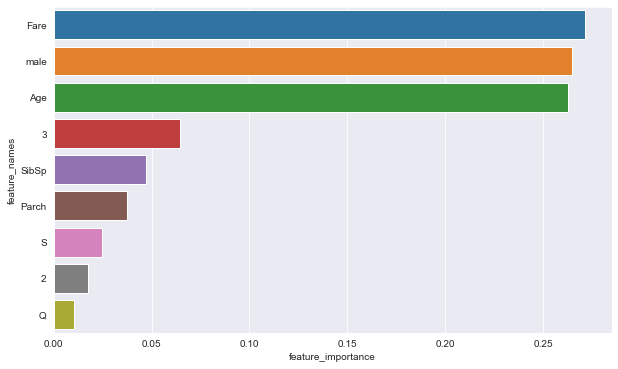

In [193]:
#feature importances
def plot_feature_importance(feature,col):
    #create arrays from feature and col
    feature_importance = np.array(feature)
    feature_names = np.array(col)
    
    #create DataFrame using a dictionary
    data={
        'feature_importance':feature_importance,
        'feature_names':feature_names
    }
    fi_df = pd.DataFrame(data)
    
    #sort fi_df in order descending feature importance
    fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    
    #add chart
    plt.figure(figsize=(10,6))
    sns.barplot(x=fi_df['feature_importance'],y=fi_df['feature_names'])


sns.set_style('darkgrid')
plot_feature_importance(rfc.feature_importances_,test_filled.columns)
